In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import association_metrics as am
from scipy.stats import chi2_contingency

In [95]:
df=pd.read_csv("C:/Users/rprat/OneDrive/Documents/Youtube/When Will Erling Haaland Stop Scoring/Haaland Scoring Data v2.csv")

In [96]:
df.fillna(0)

,Date,Season,Day,Competition,Round,Venue,Result,Squad,Opponent,Start,...,xAG,Shot Creating Actions,Goal Creating Actions,Attempted Take-Ons,Succesful Take-Ons,Goal from Penalty Kick,Opponent Win Record,Opponent Draw Record,Opponent Loss Record,Match Report
0,23-Mar,2018,Sun,Eliteserien,Regular season,Home,W 5–0,Molde,Sandefjord,N,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,Match Report
1,23-Mar,2018,Sun,Eliteserien,Regular season,Away,W 1–0,Molde,Haugesund,N,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,Match Report
2,23-Apr,2018,Sun,Eliteserien,Regular season,Away,L 0–4,Molde,Rosenborg,N,...,0.0,0.0,0.0,0.0,0.0,0,0,2,1,Match Report
3,23-Apr,2018,Sun,Eliteserien,Regular season,Home,W 2–1,Molde,Lillestrøm,Y,...,0.0,0.0,0.0,0.0,0.0,1,1,1,2,Match Report
4,23-Apr,2018,Sun,Eliteserien,Regular season,Away,D 0–0,Molde,Vålerenga,Y,...,0.0,0.0,0.0,0.0,0.0,0,3,0,2,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,11-May,2023-2024,Sat,Premier League,Regular season,Away,W 4–0,Manchester City,Fulham,Y,...,0.1,1.0,1.0,1.0,0.0,0,12,8,16,0
267,14-May,2023-2024,Tue,Premier League,Regular season,Away,W 2–0,Manchester City,Tottenham,Y,...,0.0,2.0,0.0,0.0,0.0,1,19,6,11,0
268,19-May,2023-2024,Sun,Premier League,Regular season,Home,W 3–1,Manchester City,West Ham,Y,...,0.0,0.0,0.0,0.0,0.0,0,14,10,13,0
269,25-May,2023-2024,Sat,FA Cup,Final,Neutral,L 1–2,Manchester City,Manchester Utd,Y,...,0.0,3.0,1.0,1.0,0.0,0,4,1,0,0


## Part I: Data Exploration - Context

In [97]:
df["Score?"]=np.where(df["Goals"]>0, "Scored", "Didn't Score")

In [98]:
df=df[df["Squad"]!="Molde"]

In [99]:
games_goal=len(df[(df["Score?"]=="Scored")])
games_nogoal=len(df[(df["Score?"]=="Didn't Score")])

print(f"Haaland has scored in {round((games_goal/(games_nogoal+games_goal))*100)}% of the games he has played in the last 5 years.")

total_goals=df["Goals"].sum()

print(f"Haaland has scored {((total_goals/(games_nogoal+games_goal)))} goals per game")
print(f"Haaland has scored {total_goals} goals in {(games_nogoal+games_goal)} appearances across all competitions.")

Haaland has scored in 56% of the games he has played in the last 5 years.
Haaland has scored 0.9585062240663901 goals per game
Haaland has scored 231 goals in 241 appearances across all competitions.


### Messi Goals First 5 Years

In [7]:
messi_df=pd.read_excel("C:/Users/rprat/OneDrive/Documents/Youtube/When Will Erling Haaland Stop Scoring/Messi Career Stats.xlsx")

In [8]:
messi_df["Score?"]=np.where(messi_df["Gls"]>0, "Scored", "Didn't Score")

In [9]:
games_goal=len(messi_df[(messi_df["Score?"]=="Scored")])
games_nogoal=len(messi_df[(messi_df["Score?"]=="Didn't Score")])

print(f"Messi scored in {round((games_goal/(games_nogoal+games_goal))*100)}% of the games he played in in the first 5 years of his career.")

total_goals=messi_df["Gls"].sum()

print(f"Messi has scored {((total_goals/(games_nogoal+games_goal)))} goals per game")
print(f"Messi has made {round(games_nogoal+games_goal)} appearances across all competitions.")

Messi scored in 39% of the games he played in in the first 5 years of his career.
Messi has scored 0.5098039215686274 goals per game
Messi has made 153 appearances across all competitions.


### Ronaldo Goals First 5 Years

In [10]:
ronaldo_df=pd.read_excel("C:/Users/rprat/OneDrive/Documents/Youtube/When Will Erling Haaland Stop Scoring/Ronaldo Career Stats.xlsx")

In [11]:
ronaldo_df["Score?"]=np.where(ronaldo_df["Gls"]>0, "Scored", "Didn't Score")

In [12]:
games_goal=len(ronaldo_df[(ronaldo_df["Score?"]=="Scored")])
games_nogoal=len(ronaldo_df[(ronaldo_df["Score?"]=="Didn't Score")])

print(f"Ronaldo scored in {round((games_goal/(games_nogoal+games_goal))*100)}% of the games he played in in the first 5 years of his career.")

total_goals=ronaldo_df["Gls"].sum()

print(f"Ronaldo has scored {((total_goals/(games_nogoal+games_goal)))} goals per game")
print(f"Ronaldo has made {round(games_nogoal+games_goal)} appearances across all competitions.")

Ronaldo scored in 20% of the games he played in in the first 5 years of his career.
Ronaldo has scored 0.2590909090909091 goals per game
Ronaldo has made 220 appearances across all competitions.


### When Will He Beat Shearer's Record for All-Time EPL Goalscorer?


In [13]:
shearer_df=pd.read_excel("C:/Users/rprat/OneDrive/Documents/Youtube/When Will Erling Haaland Stop Scoring/Shearer Career Stats.xlsx")

In [14]:
shearer_epl_df=shearer_df[(shearer_df["Competition"]=="Premier League")]

shearer_epl_df["Game Count"]=range(1, len(shearer_epl_df)+1)
shearer_epl_df["Goal Tally"]=shearer_epl_df["Gls"].cumsum()

<ipython-input-14-ac5277683ae2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shearer_epl_df["Game Count"]=range(1, len(shearer_epl_df)+1)
<ipython-input-14-ac5277683ae2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shearer_epl_df["Goal Tally"]=shearer_epl_df["Gls"].cumsum()


In [100]:
haaland_epl_df=df[(df["Competition"]=="Premier League")]

haaland_epl_df["Game Count"]=range(1, len(haaland_epl_df)+1)
haaland_epl_df["Goal Tally"]=haaland_epl_df["Goals"].cumsum()

<ipython-input-100-923cb257cabd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haaland_epl_df["Game Count"]=range(1, len(haaland_epl_df)+1)
<ipython-input-100-923cb257cabd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haaland_epl_df["Goal Tally"]=haaland_epl_df["Goals"].cumsum()


In [101]:
haaland_epl_games=len(haaland_epl_df)
haaland_epl_goals=haaland_epl_df.Goals.sum()
print("In the Premier League, Haaland scores a goal every", str(round(haaland_epl_games/haaland_epl_goals,2)),"games")
print("In the Premier League, Haaland scores ", str(haaland_epl_goals/haaland_epl_games)," goals every game")

In the Premier League, Haaland scores a goal every 1.05 games
In the Premier League, Haaland scores  0.9545454545454546  goals every game


In [102]:
games_to_record=math.ceil(260*(haaland_epl_games/haaland_epl_goals))
print("He will reach Shearer's record of 260 EPL goals in", str(games_to_record),"games")
print("Haaland has played", str(haaland_epl_games),"Premier League games so far. It will take him", str(math.floor((games_to_record-haaland_epl_games)/38)),"more seasons to reach the record at this goal rate.")
print("That is", str(441-games_to_record), "games less than it took Alan Shearer")

He will reach Shearer's record of 260 EPL goals in 273 games
Haaland has played 66 Premier League games so far. It will take him 5 more seasons to reach the record at this goal rate.
That is 168 games less than it took Alan Shearer


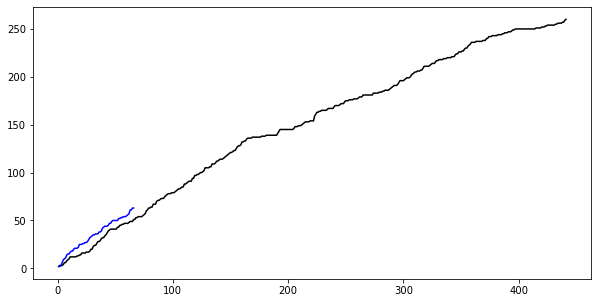

In [103]:
###Shearer vs Haaland Graph

fig, ax=plt.subplots(figsize=(10,5))
plt.plot(shearer_epl_df["Game Count"],shearer_epl_df["Goal Tally"], color="black")
plt.plot(haaland_epl_df["Game Count"],haaland_epl_df["Goal Tally"], color="blue")
plt.show()


## Part II: Data Cleaning

### Step 1: Reformat data

In [104]:
df["Date"]=df["Date"].str[-3:]

In [105]:
df=df[df["Competition"]=="Premier League"]

In [106]:
for i in df["Competition"]:
    if i in ["Eliteserien", "Premier League", "Austrian Bundesliga", "Bundesliga"]:
        df["Competition"]=df["Competition"].replace(i, "Domestic League")    
    elif i in ["Community Shield", "DFB-Pokal","EFL Cup", "DFL-Supercup", "FA Cup"]:
        df["Competition"]=df["Competition"].replace(i, "Domestic Cup")    
    elif i in ["Champions League", "Europa League", "UEFA Super Cup"]:
        df["Competition"]=df["Competition"].replace(i, "European Club Competition")
    elif i in ["UEFA Euros", "World Cup"]:
        df["Competition"]=df["Competition"].replace(i, "International Competition")

In [107]:
for i in df["Round"]:
    if i in ["Round of 16", "Quarter-finals", "Semi-finals", "Fourth round", "Round of 64", "First round", "Final", "Fifth Round"]:
        df["Round"]=df["Round"].replace(i, "Knockouts") 

In [108]:
df["Competition"]=df["Competition"]+" "+df["Round"]

In [109]:
df["Opponent Form"]=df["Opponent Win Record"]-df["Opponent Loss Record"]+df["Opponent Draw Record"]*0.5
df["Opponent Form"]=df["Opponent Form"].astype(float)

In [110]:
df["Competition"]=df["Competition"].replace("International Friendly International Friendly", "International Friendly")

In [111]:
df=df[df["Competition"]=="Domestic League Regular season"]

In [112]:
df_original=df.copy()

In [113]:
df.drop(columns=["Round", "Result","Squad","Opponent","Position","Minutes Played","Goals","Assists","Shots",
                 "Shots on Target","xG","npxG","xAG","Shot Creating Actions", "Goal Creating Actions","Attempted Take-Ons",
                 "Succesful Take-Ons","Goal from Penalty Kick","Opponent Win Record", "Opponent Draw Record", "Opponent Loss Record", 
                 "Match Report", "Competition"], inplace=True)

In [114]:
df

,Date,Season,Day,Venue,Start,Score?,Opponent Form
164,Aug,2022-2023,Sun,Away,Y,Scored,0.0
165,Aug,2022-2023,Sat,Home,Y,Didn't Score,1.0
166,Aug,2022-2023,Sun,Away,Y,Scored,1.5
167,Aug,2022-2023,Sat,Home,Y,Scored,0.5
168,Aug,2022-2023,Wed,Home,Y,Scored,-0.5
...,...,...,...,...,...,...,...
264,Apr,2023-2024,Sun,Away,N,Scored,-6.5
265,May,2023-2024,Sat,Home,Y,Scored,1.5
266,May,2023-2024,Sat,Away,Y,Didn't Score,0.0
267,May,2023-2024,Tue,Away,Y,Scored,11.0


In [115]:
df["Date"].value_counts()

Feb    10
May     9
Aug     8
Apr     7
Oct     7
Sep     6
Mar     5
Nov     5
Jan     5
Dec     4
Name: Date, dtype: int64

In [116]:
df["Day"].value_counts()

Sat    32
Sun    20
Wed     8
Tue     2
Thu     2
Fri     1
Mon     1
Name: Day, dtype: int64

In [117]:
df["Venue"].value_counts()

Away    33
Home    33
Name: Venue, dtype: int64

In [118]:
#df["Competition"].value_counts()

In [119]:
#df=df[df["Date"]!="Jul"]
#df=df[df["Day"]!="Mon"]
#df=df[df["Competition"]!="International Friendly"]

In [120]:
#df=df[df["Venue"]!="Neutral"]

## Part III: Model Development

### Step 1: Prepare Data for Computation

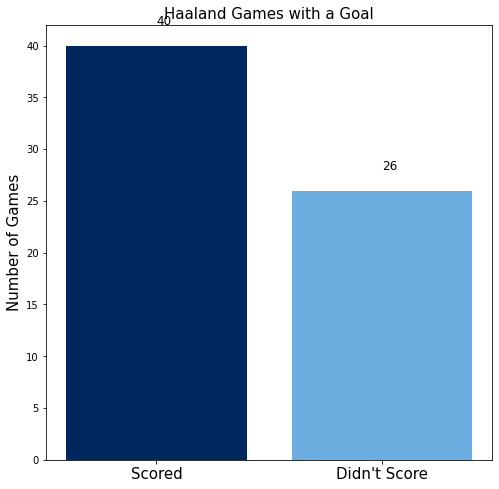

In [121]:
df["Score?"].value_counts()

scored_counts_dict=dict(df["Score?"].value_counts())
scored=list(scored_counts_dict.keys())
counts=list(scored_counts_dict.values())

fig, ax=plt.subplots(figsize=(8,8))
plt.bar(scored[0], counts[0],  color='#00285e')
plt.bar(scored[1], counts[1],  color='#6caddf')
plt.ylabel("Number of Games",fontsize=15)
plt.xticks(fontsize=15)
plt.title("Haaland Games with a Goal", fontsize=15)

for i in scored:
    plt.text(x=i, y=scored_counts_dict[i]+2, s=scored_counts_dict[i], fontsize=12)

The data is imbalanced

In [122]:
df['Score?'] = df['Score?'].map({'Scored': 1, "Didn't Score": 0})

In [123]:
#Balance target data
from sklearn.utils import resample

df_majority = df[(df['Score?']==1)] 
df_minority = df[(df['Score?']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= scored_counts_dict["Scored"], # to match majority class
                                 random_state=42)  # reproducible results

df = pd.concat([df_minority_upsampled, df_majority])

In [124]:
df['Score?'].value_counts()

1    40
0    40
Name: Score?, dtype: int64

In [125]:
#predictors
x=df.drop("Score?",axis=1)
predictors=x

#target variable
y=df["Score?"]

In [126]:
encoded_df=pd.get_dummies(df, columns=["Day","Date","Venue","Start"])

In [127]:
encoded_df=encoded_df.drop(columns="Season", axis=1)

In [128]:
y=encoded_df["Score?"]
x=encoded_df.drop("Score?", axis=1)

In [129]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

k=14
selector = SelectKBest(score_func=f_classif, k=k)
x_new = selector.fit_transform(x, y)

# Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

selected_features = x.columns[selected_features_indices]

print(f"Selected features: {selected_features}")

Selected features: Index(['Opponent Form', 'Day_Fri', 'Day_Mon', 'Day_Sat', 'Day_Sun', 'Day_Tue',
       'Date_Apr', 'Date_Aug', 'Date_Feb', 'Date_Mar', 'Date_May', 'Date_Sep',
       'Start_N', 'Start_Y'],
      dtype='object')


In [130]:
x=encoded_df[list(selected_features)]

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Step 2: Training the Model

In [132]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [133]:
#Logistic Rgeression hyperparameter tuning
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.668889 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.653333 (0.170316) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.653333 (0.170316) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.653333 (0.170316) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.634444 (0.188067) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.634444 (0.188067) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.634444 (0.188067) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.662222 (0.200875) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.662222 (0.200875) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.668889 (0.195303) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.611111 (0.193091) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611111 (0.193091) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.606667 (0.185871) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.588889 (0.177917) wit

In [134]:
#Train
lr_model=LogisticRegression(penalty=grid_result.best_params_["penalty"], solver=grid_result.best_params_["solver"],C=grid_result.best_params_["C"])
lr_model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [135]:
lr_predictions=lr_model.predict(x_test)

In [136]:
#Evaluate
from sklearn import metrics
lr_confusion_matrix=pd.DataFrame(metrics.confusion_matrix(y_test, lr_predictions, labels=[0,1]), index=['True No Score', 'True  Score'], columns=['Predicted No Score', 'Predicted Score'])
lr_confusion_matrix

,Predicted No Score,Predicted Score
True No Score,11,2
True Score,3,8


In [137]:
lr_accuracy=metrics.accuracy_score(y_test, lr_predictions)
lr_precision=metrics.precision_score(y_test, lr_predictions)
lr_recall=metrics.recall_score(y_test, lr_predictions)
lr_f1=metrics.f1_score(y_test, lr_predictions)

In [138]:
lr_scores = cross_val_score(lr_model, x, y, cv=5, scoring='accuracy')

lr_mean_accuracy = lr_scores.mean()
std_accuracy = lr_scores.std()

In [139]:
lr_performance_summary=pd.DataFrame([lr_accuracy,lr_precision,lr_recall,lr_f1,lr_mean_accuracy],index=["Accuracy","Precision","Recall","F1", "5-Fold CV Mean Accuracy"],columns=["Logistic Regression"])
lr_performance_summary

,Logistic Regression
Accuracy,0.791667
Precision,0.800000
Recall,0.727273
F1,0.761905
5-Fold CV Mean Accuracy,0.712500


Precision: In what percentage of games in which he was predicted to score did he score

Recall: What percentage of games with a goal were correctly identified/predicted

### Step 3: Model Interpretation

In [55]:
coefficients_df=pd.DataFrame(lr_model.coef_, columns=['Opponent Form', 'Day_Fri', 'Day_Mon', 'Day_Sat', 'Day_Sun', 'Day_Tue',
       'Start_N', 'Start_Y', 'Date_Apr', 'Date_Aug', 'Date_Feb', 'Date_Mar',
       'Date_May', 'Date_Sep'])
coefficients_df=coefficients_df.transpose()
coefficients_df=coefficients_df.rename(columns={0:"LR Model Coefficient"})
#coefficients_df=coefficients_df.sort_values(by='LR Model Coefficient', ascending=False)
coefficients_df

,LR Model Coefficient
Opponent Form,-0.060086
Day_Fri,0.230789
Day_Mon,-0.326344
Day_Sat,0.060762
Day_Sun,-0.516867
Day_Tue,0.463048
Start_N,1.359022
Start_Y,0.450689
Date_Apr,-1.100246
Date_Aug,0.096310


In [56]:
coefficients=lr_model.coef_[0]
odds_ratios=[np.exp(x) for x in coefficients] 
odds_impact=[str(round((x-1)*100,2))+"%" for x in odds_ratios]

In [57]:
coefficients_df["Odds Ratio"]=odds_ratios
coefficients_df["Impact on Odds of Scoring"]=odds_impact

In [58]:
coefficients_df

,LR Model Coefficient,Odds Ratio,Impact on Odds of Scoring
Opponent Form,-0.060086,0.941684,-5.83%
Day_Fri,0.230789,1.259594,25.96%
Day_Mon,-0.326344,0.721557,-27.84%
Day_Sat,0.060762,1.062646,6.26%
Day_Sun,-0.516867,0.596386,-40.36%
Day_Tue,0.463048,1.588910,58.89%
Start_N,1.359022,3.892385,289.24%
Start_Y,0.450689,1.569393,56.94%
Date_Apr,-1.100246,0.332789,-66.72%
Date_Aug,0.096310,1.101101,10.11%


In [59]:
game_arrays = []

# Days of the week (Indexes 1-5)
days_of_week = np.eye(5, dtype=int)

# Player starting (Indexes 6-7, all combinations of starting status)
starting_status = [combo for combo in itertools.product([0, 1], repeat=2) if sum(combo) == 1]

# Months (Indexes 8-13)
months = np.eye(6, dtype=int)

# Iterate over combinations of days, starting status, and months
for day in days_of_week:
    for start in starting_status:
        for month in months:
            game_array = np.concatenate(([0], day, start, month))
            game_arrays.append(game_array)

# Convert to a NumPy array
game_arrays = np.array(game_arrays)

score_probabilities = lr_model.predict_proba(game_arrays)[:, 1]  # Probability of scoring

# Step 5: Map the index positions to meaningful names
days_names = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Tuesday']
starting_names = ['Not Starting', 'Starting']
months_names = ['April', 'August', 'February', 'March', 'May', 'September']

# Function to generate the key based on which variables have a value of 1
def generate_key(game_array):
    keys = []
    
    # Day of the week (indexes 1-5)
    for i, day in enumerate(game_array[1:6]):
        if day == 1:
            keys.append(days_names[i])
    
    # Starting position (indexes 6-7)
    for i, start in enumerate(game_array[6:8]):
        if start == 1:
            keys.append(starting_names[i])
    
    # Month (indexes 8-13)
    for i, month in enumerate(game_array[8:14]):
        if month == 1:
            keys.append(months_names[i])

    return ', '.join(keys)

# Step 6: Build the dictionary
predictions_dict = {}

for game_array, prob in zip(game_arrays, score_probabilities):
    key = generate_key(game_array)
    predictions_dict[key] = prob

# Step 7: Display the dictionary
for k, v in predictions_dict.items():
    print(f"{k}: {v:.4f}")

Friday, Starting, April: 0.3681
Friday, Starting, August: 0.6584
Friday, Starting, February: 0.5945
Friday, Starting, March: 0.7750
Friday, Starting, May: 0.4486
Friday, Starting, September: 0.7693
Friday, Not Starting, April: 0.5910
Friday, Not Starting, August: 0.8270
Friday, Not Starting, February: 0.7843
Friday, Not Starting, March: 0.8952
Friday, Not Starting, May: 0.6686
Friday, Not Starting, September: 0.8921
Monday, Starting, April: 0.2502
Monday, Starting, August: 0.5247
Monday, Starting, February: 0.4565
Monday, Starting, March: 0.6636
Monday, Starting, May: 0.3179
Monday, Starting, September: 0.6564
Monday, Not Starting, April: 0.4528
Monday, Not Starting, August: 0.7325
Monday, Not Starting, February: 0.6756
Monday, Not Starting, March: 0.8303
Monday, Not Starting, May: 0.5361
Monday, Not Starting, September: 0.8257
Saturday, Starting, April: 0.3295
Saturday, Starting, August: 0.6192
Saturday, Starting, February: 0.5529
Saturday, Starting, March: 0.7440
Saturday, Starting, 

C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Against a neutral opponent (0 form points):

- Haaland is most likely to score an EPL goal when he does not start a Tuesday game in March
- Haaland is least likely to score an EPL when he starts a Sunday game in April

In [60]:
game= np.array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]) 
prediction = lr_model.predict(game)
prediction_proba = lr_model.predict_proba(game)

probability=round(prediction_proba[0][1]*100,1)
print(f"Probability Haaland will score: {probability}%")

if prediction[0]==1:
    print("Haaland will score.")
else:
    print("Haaland won't score.")

Probability Haaland will score: 86.8%
Haaland will score.


C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Part IV: Data Exploration Continued - Check Final Conclusion

### Goals by Starts

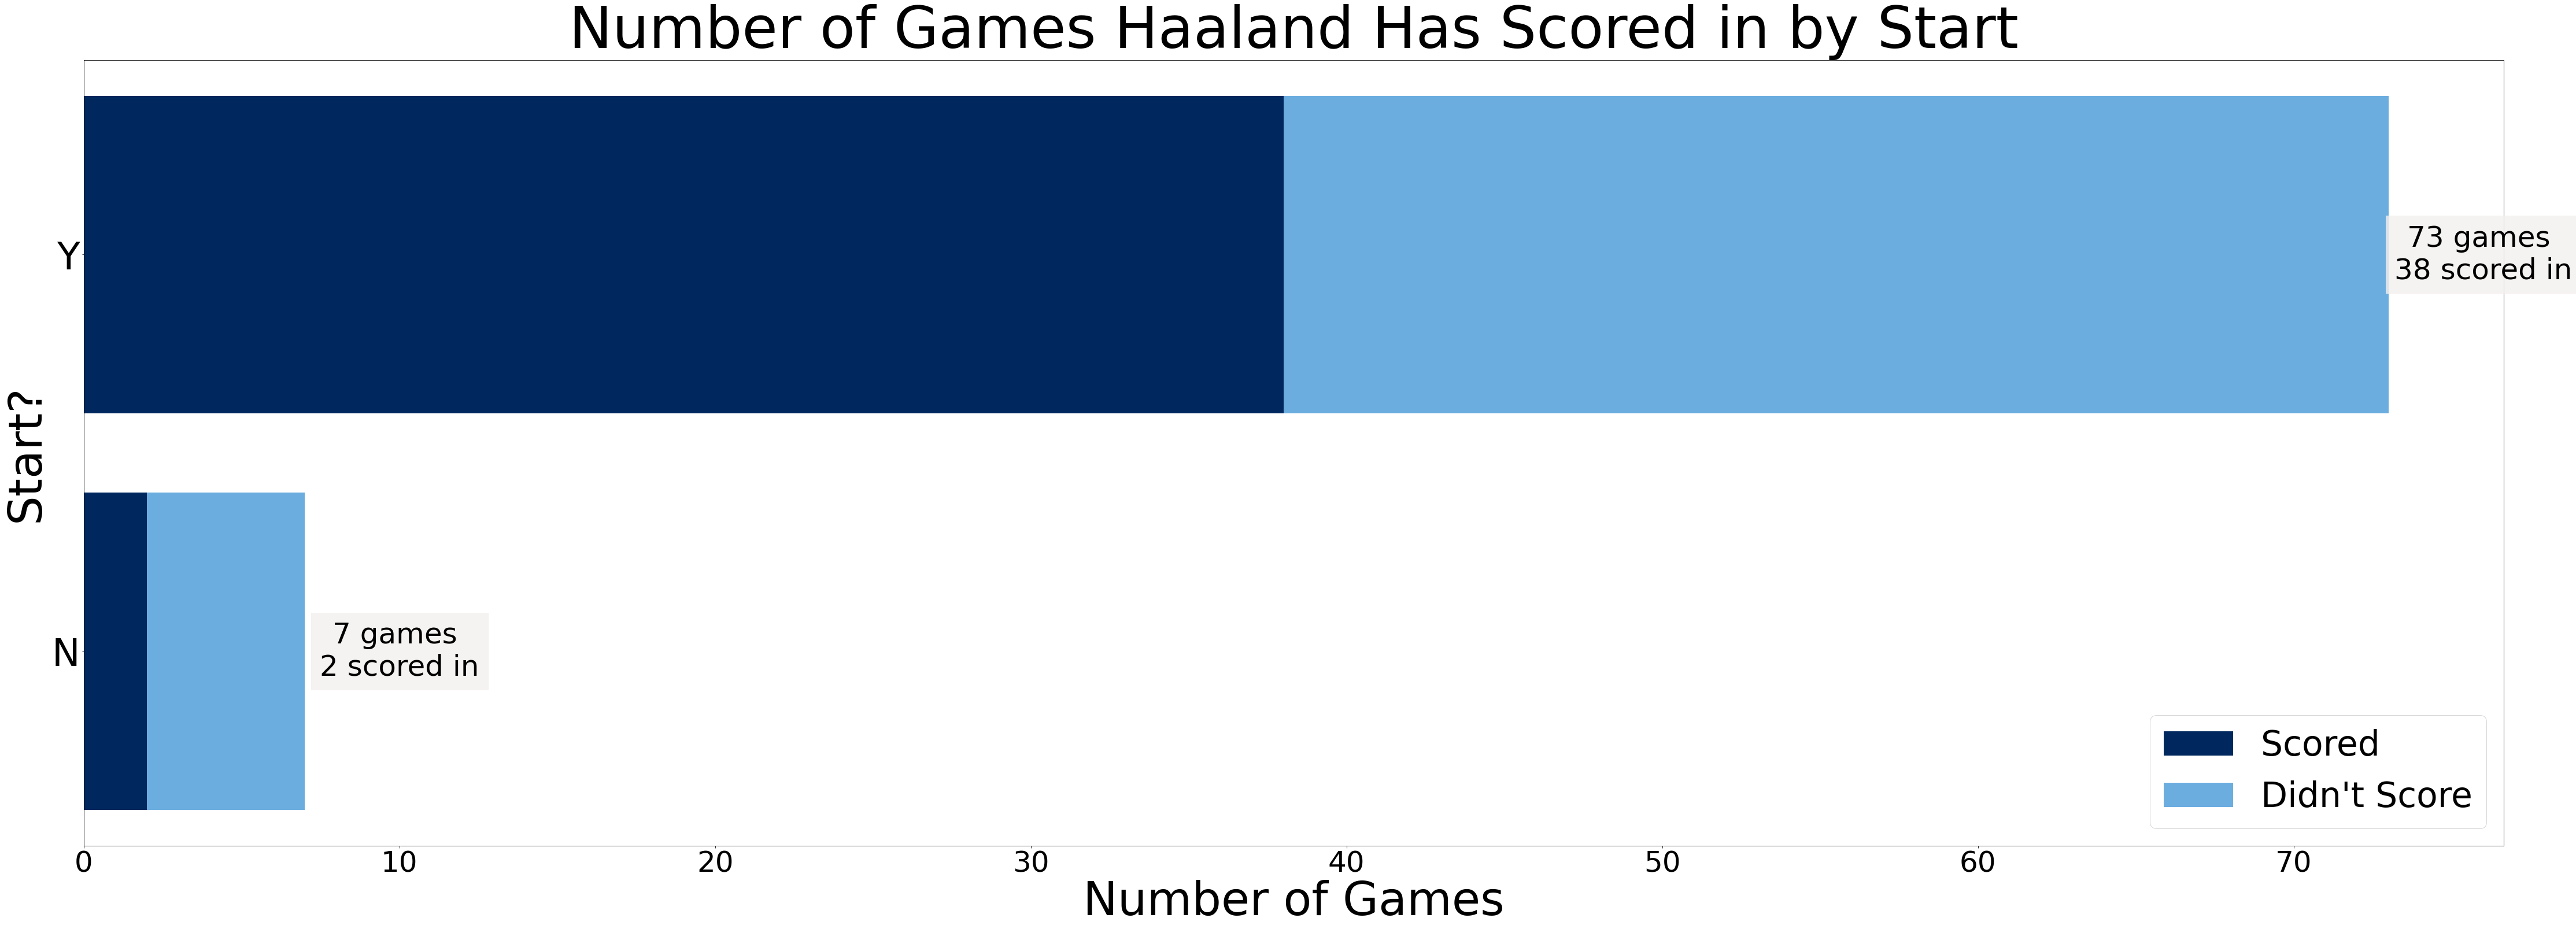

In [61]:
starts=["N", "Y"]
start_goal=[len(df[(df["Score?"]==1)&(df["Start"]==i)]) for i in starts]
start_games=[len(df[(df["Start"]==i)]) for i in starts]
games_no_goals=[a-b for a,b in zip(start_games,start_goal)]

fig, ax=plt.subplots(figsize=(75,25))
ax.barh(starts, start_goal, color='#00285e')
ax.barh(starts, games_no_goals, left=start_goal, color='#6caddf')
plt.yticks(fontsize=65)
plt.ylabel("Start?", fontsize=80)
plt.xticks(fontsize=50)
plt.xlabel("Number of Games", fontsize=80)
ax.legend(["Scored","Didn't Score"], fontsize=60, loc= 'lower right')
for i in range(len(start_goal)):
    ax.text((games_no_goals[i]+start_goal[i])+3, starts[i], str(start_games[i])+ " games \n"+str(start_goal[i])+" scored in", ha='center', va="center", fontsize=50, bbox=dict(facecolor='#f3f0ee', alpha=0.8, edgecolor="#f3f0ee", boxstyle='square'))
plt.title("Number of Games Haaland Has Scored in by Start", fontsize=100)

plt.show()

95% of Haaland's Premier League goals come from starts. Haaland has scored in 52% of the games he has started in and 29% of the games of he hasn't started in

### Goals by Venue

Text(0.5, 1.0, 'Number of Games Haaland Has Scored in by Venue')

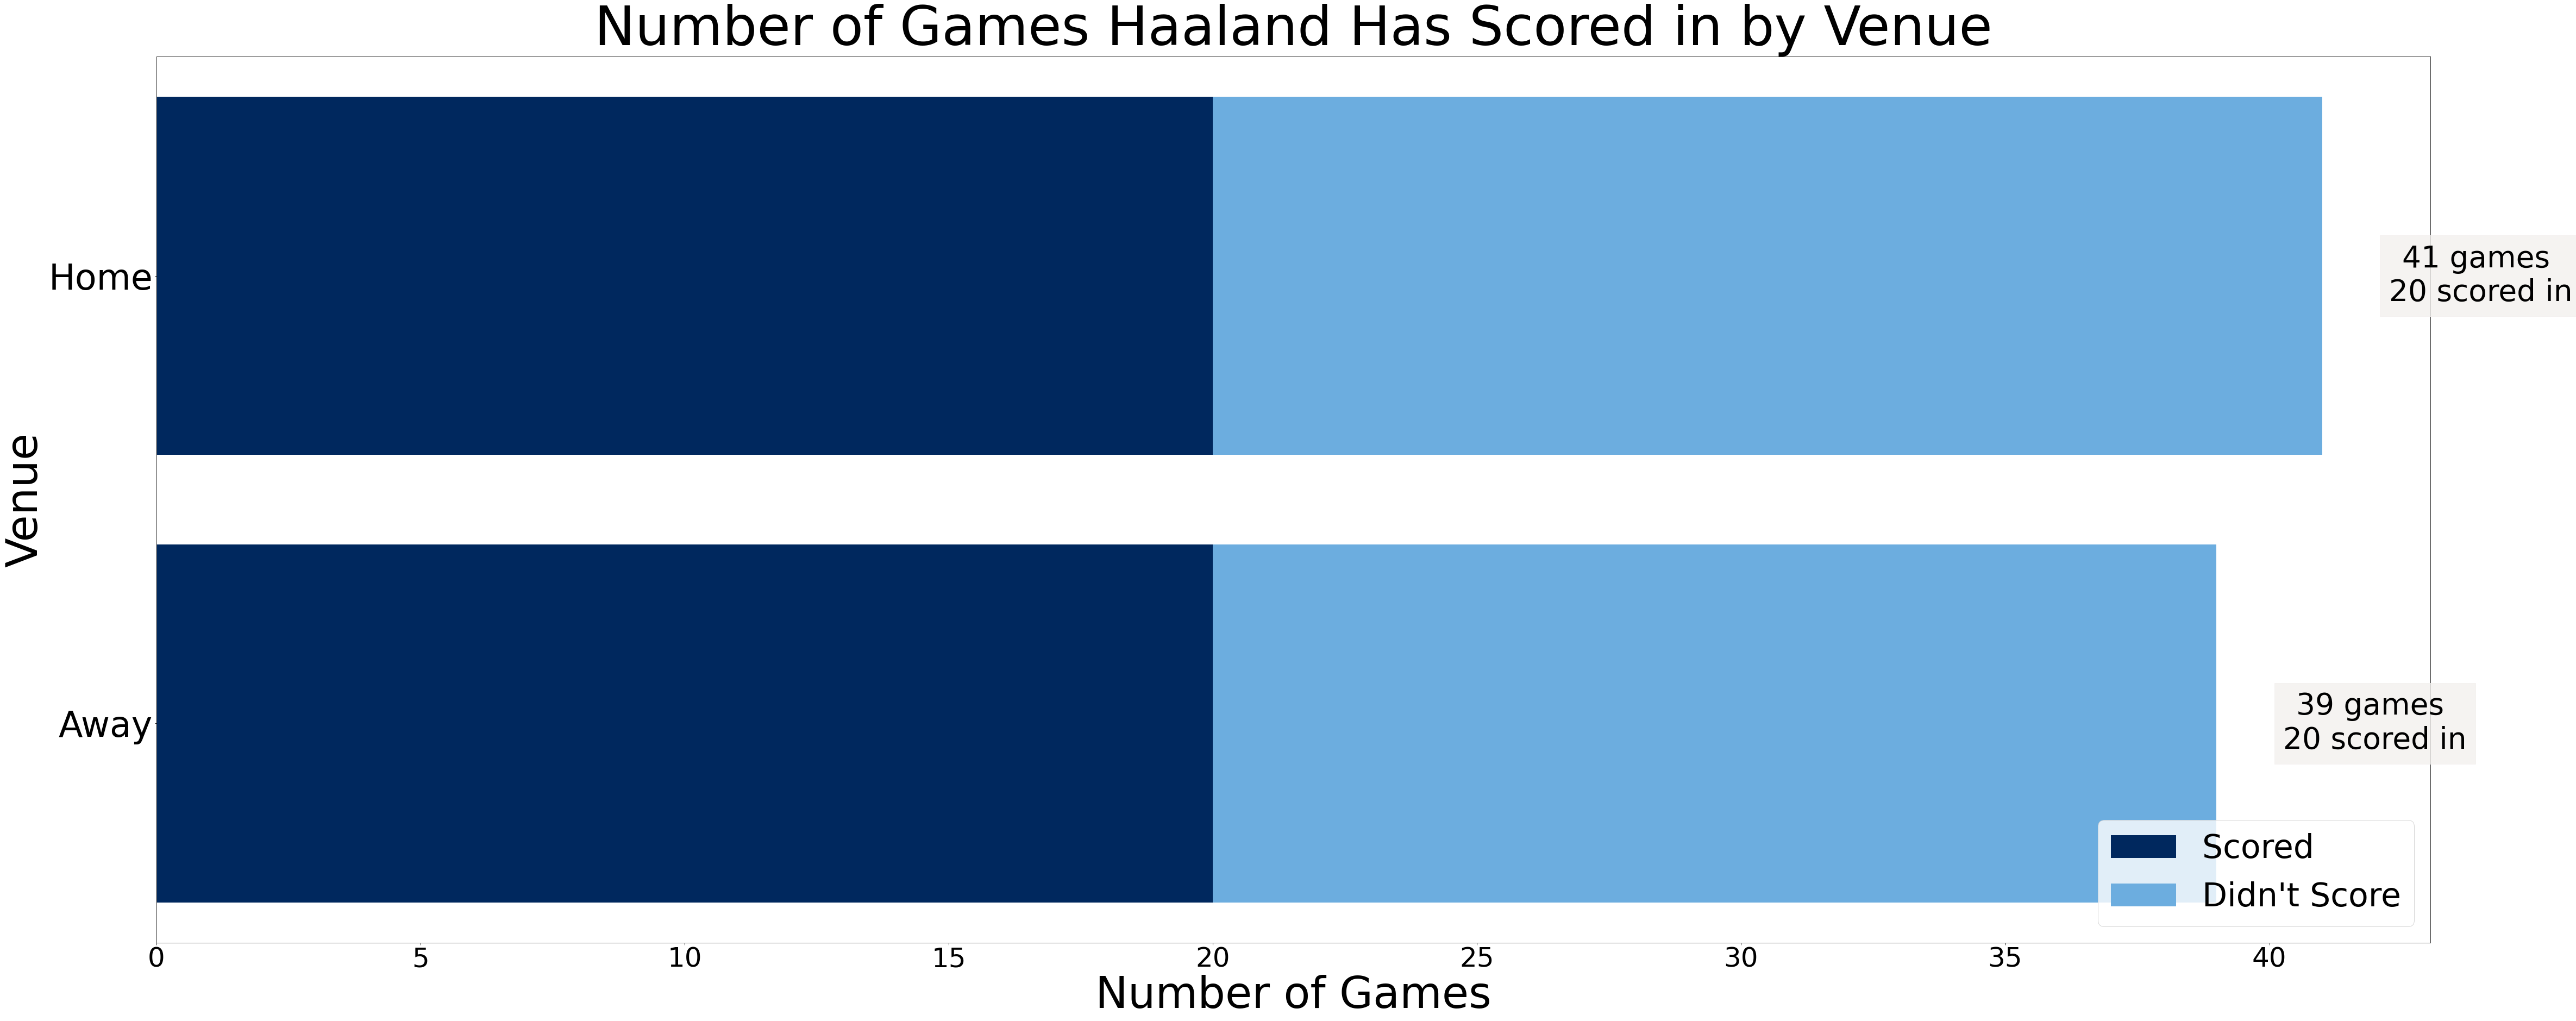

In [62]:
venues=["Away","Home"]
venue_goal=[len(df[(df["Score?"]==1)&(df["Venue"]==i)]) for i in venues]
venue_games=[len(df[(df["Venue"]==i)]) for i in venues]
games_no_goals=[a-b for a,b in zip(venue_games,venue_goal)]

fig, ax=plt.subplots(figsize=(75,30))
ax.barh(venues, venue_goal, color='#00285e')
ax.barh(venues, games_no_goals, left=venue_goal, color='#6caddf')
plt.yticks(fontsize=65)
plt.ylabel("Venue", fontsize=80)
plt.xticks(fontsize=50)
plt.xlabel("Number of Games", fontsize=80)
ax.legend(["Scored","Didn't Score"], fontsize=60, loc= 'lower right')

for i in range(len(venue_goal)):
    ax.text((games_no_goals[i]+venue_goal[i])+3, venues[i], str(venue_games[i])+ " games \n"+str(venue_goal[i])+" scored in", ha='center', va="center", fontsize=55, bbox=dict(facecolor='#f3f0ee', alpha=0.8, edgecolor="#f3f0ee", boxstyle='square'))
plt.title("Number of Games Haaland Has Scored in by Venue", fontsize=100)

50% of Haaland's Premier League goals come from home games. 

In [63]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Venue'], df['Score?'])

# Perform the Chi-Square Test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Venue is statistically significant to Haaland scoring (p < 0.05).")
else:
    print("Venue is not statistically significant to Haaland scoring (p >= 0.05).")


Chi-Square Statistic: 0.0
P-Value: 1.0
Venue is not statistically significant to Haaland scoring (p >= 0.05).


One would expect for venue to be statistically significant in determining whether a player will score, but Haaland performs so consistently in both that it doesn't matter where he's playing.

### Goals by Month

Text(0.5, 1.0, 'Number of Games Haaland Has Scored in by Month')

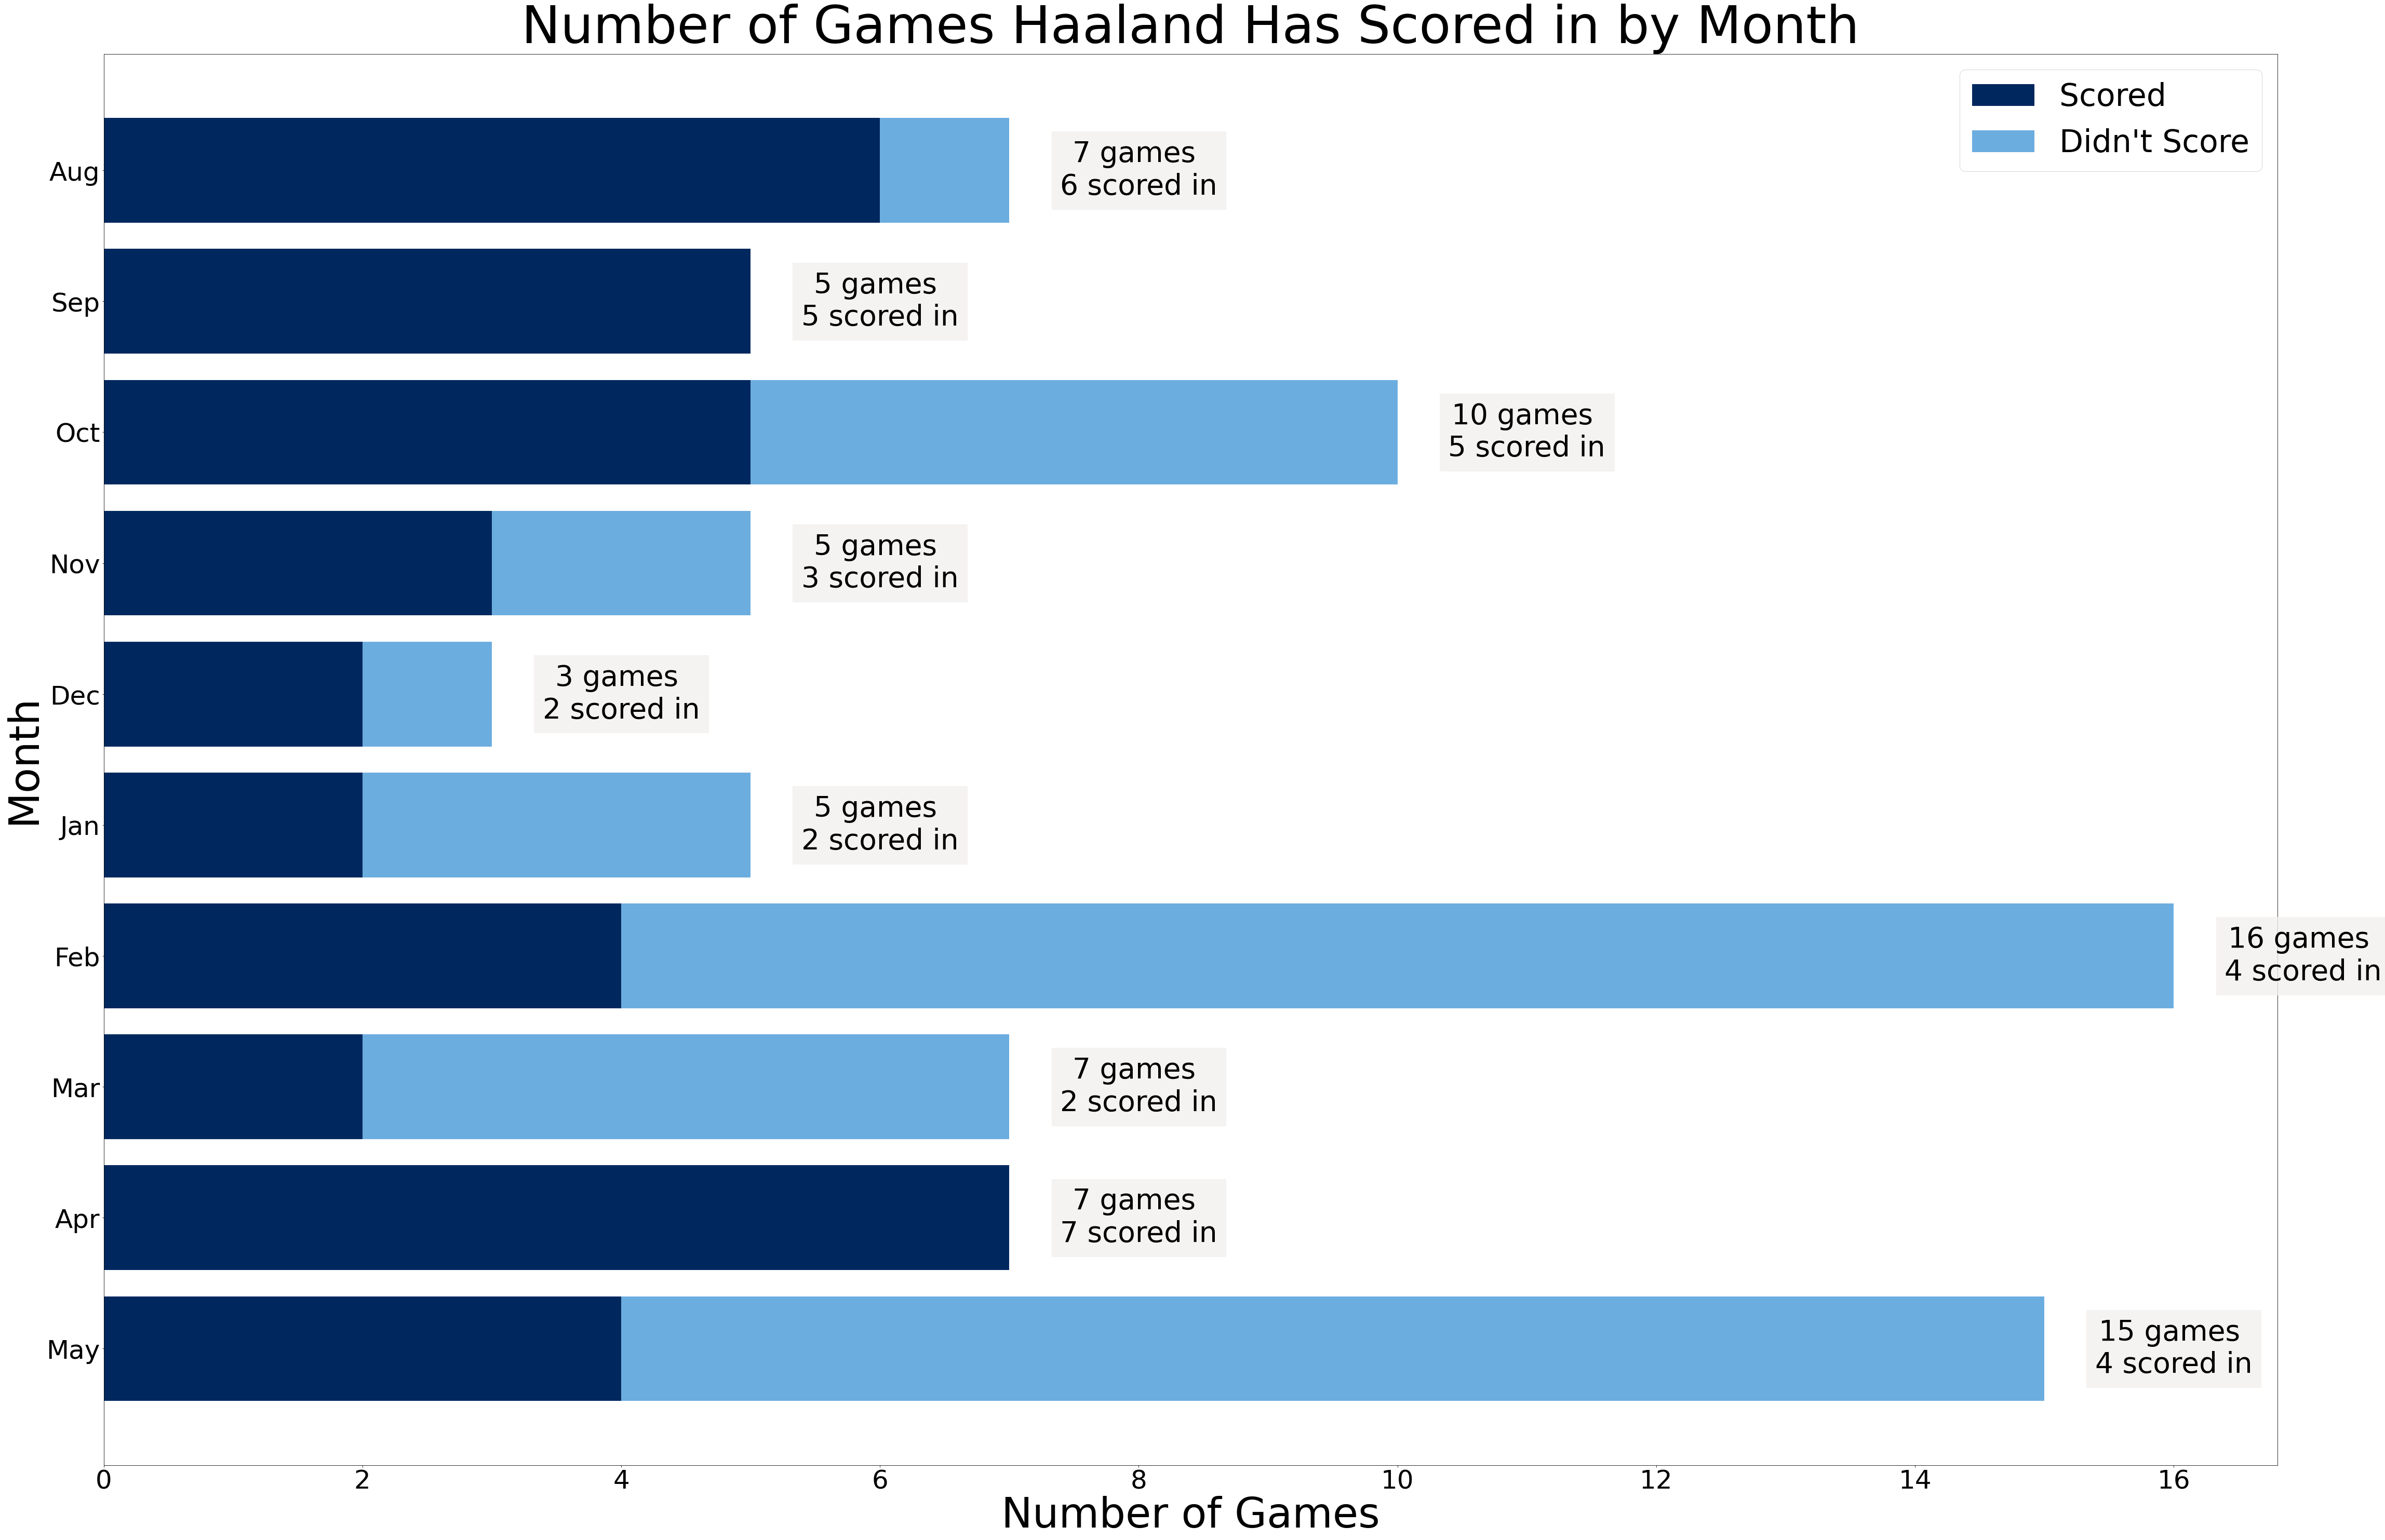

In [64]:
months=["Aug", "Sep","Oct","Nov","Dec","Jan","Feb","Mar","Apr","May"]
months.reverse()
month_goal=[len(df[(df["Score?"]==1)&(df["Date"]==i)]) for i in months]
month_games=[len(df[(df["Date"]==i)]) for i in months]
games_no_goals=[a-b for a,b in zip(month_games,month_goal)]

fig, ax=plt.subplots(figsize=(75,50))
ax.barh(months, month_goal, color='#00285e')
ax.barh(months, games_no_goals, left=month_goal, color='#6caddf')
plt.yticks(fontsize=50)
plt.ylabel("Month", fontsize=80)
plt.xticks(fontsize=50)
plt.xlabel("Number of Games", fontsize=80)
ax.legend(["Scored","Didn't Score"], fontsize=60, loc= 'upper right')

for i in range(len(month_goal)):
    ax.text((month_goal[i]+games_no_goals[i])+1, months[i], str(month_games[i])+ " games \n"+str(month_goal[i])+" scored in", ha='center', va="center", fontsize=55,bbox=dict(facecolor='#f3f0ee', alpha=0.8, edgecolor="#f3f0ee", boxstyle='square'))
plt.title("Number of Games Haaland Has Scored in by Month", fontsize=100)

Haaland scores in only 25% of his Premier Leagues in February, but in 100% of his Premier League games in April and September

### Goals by Day

Text(0.5, 1.0, 'Number of Games Haaland Has Scored in by Day')

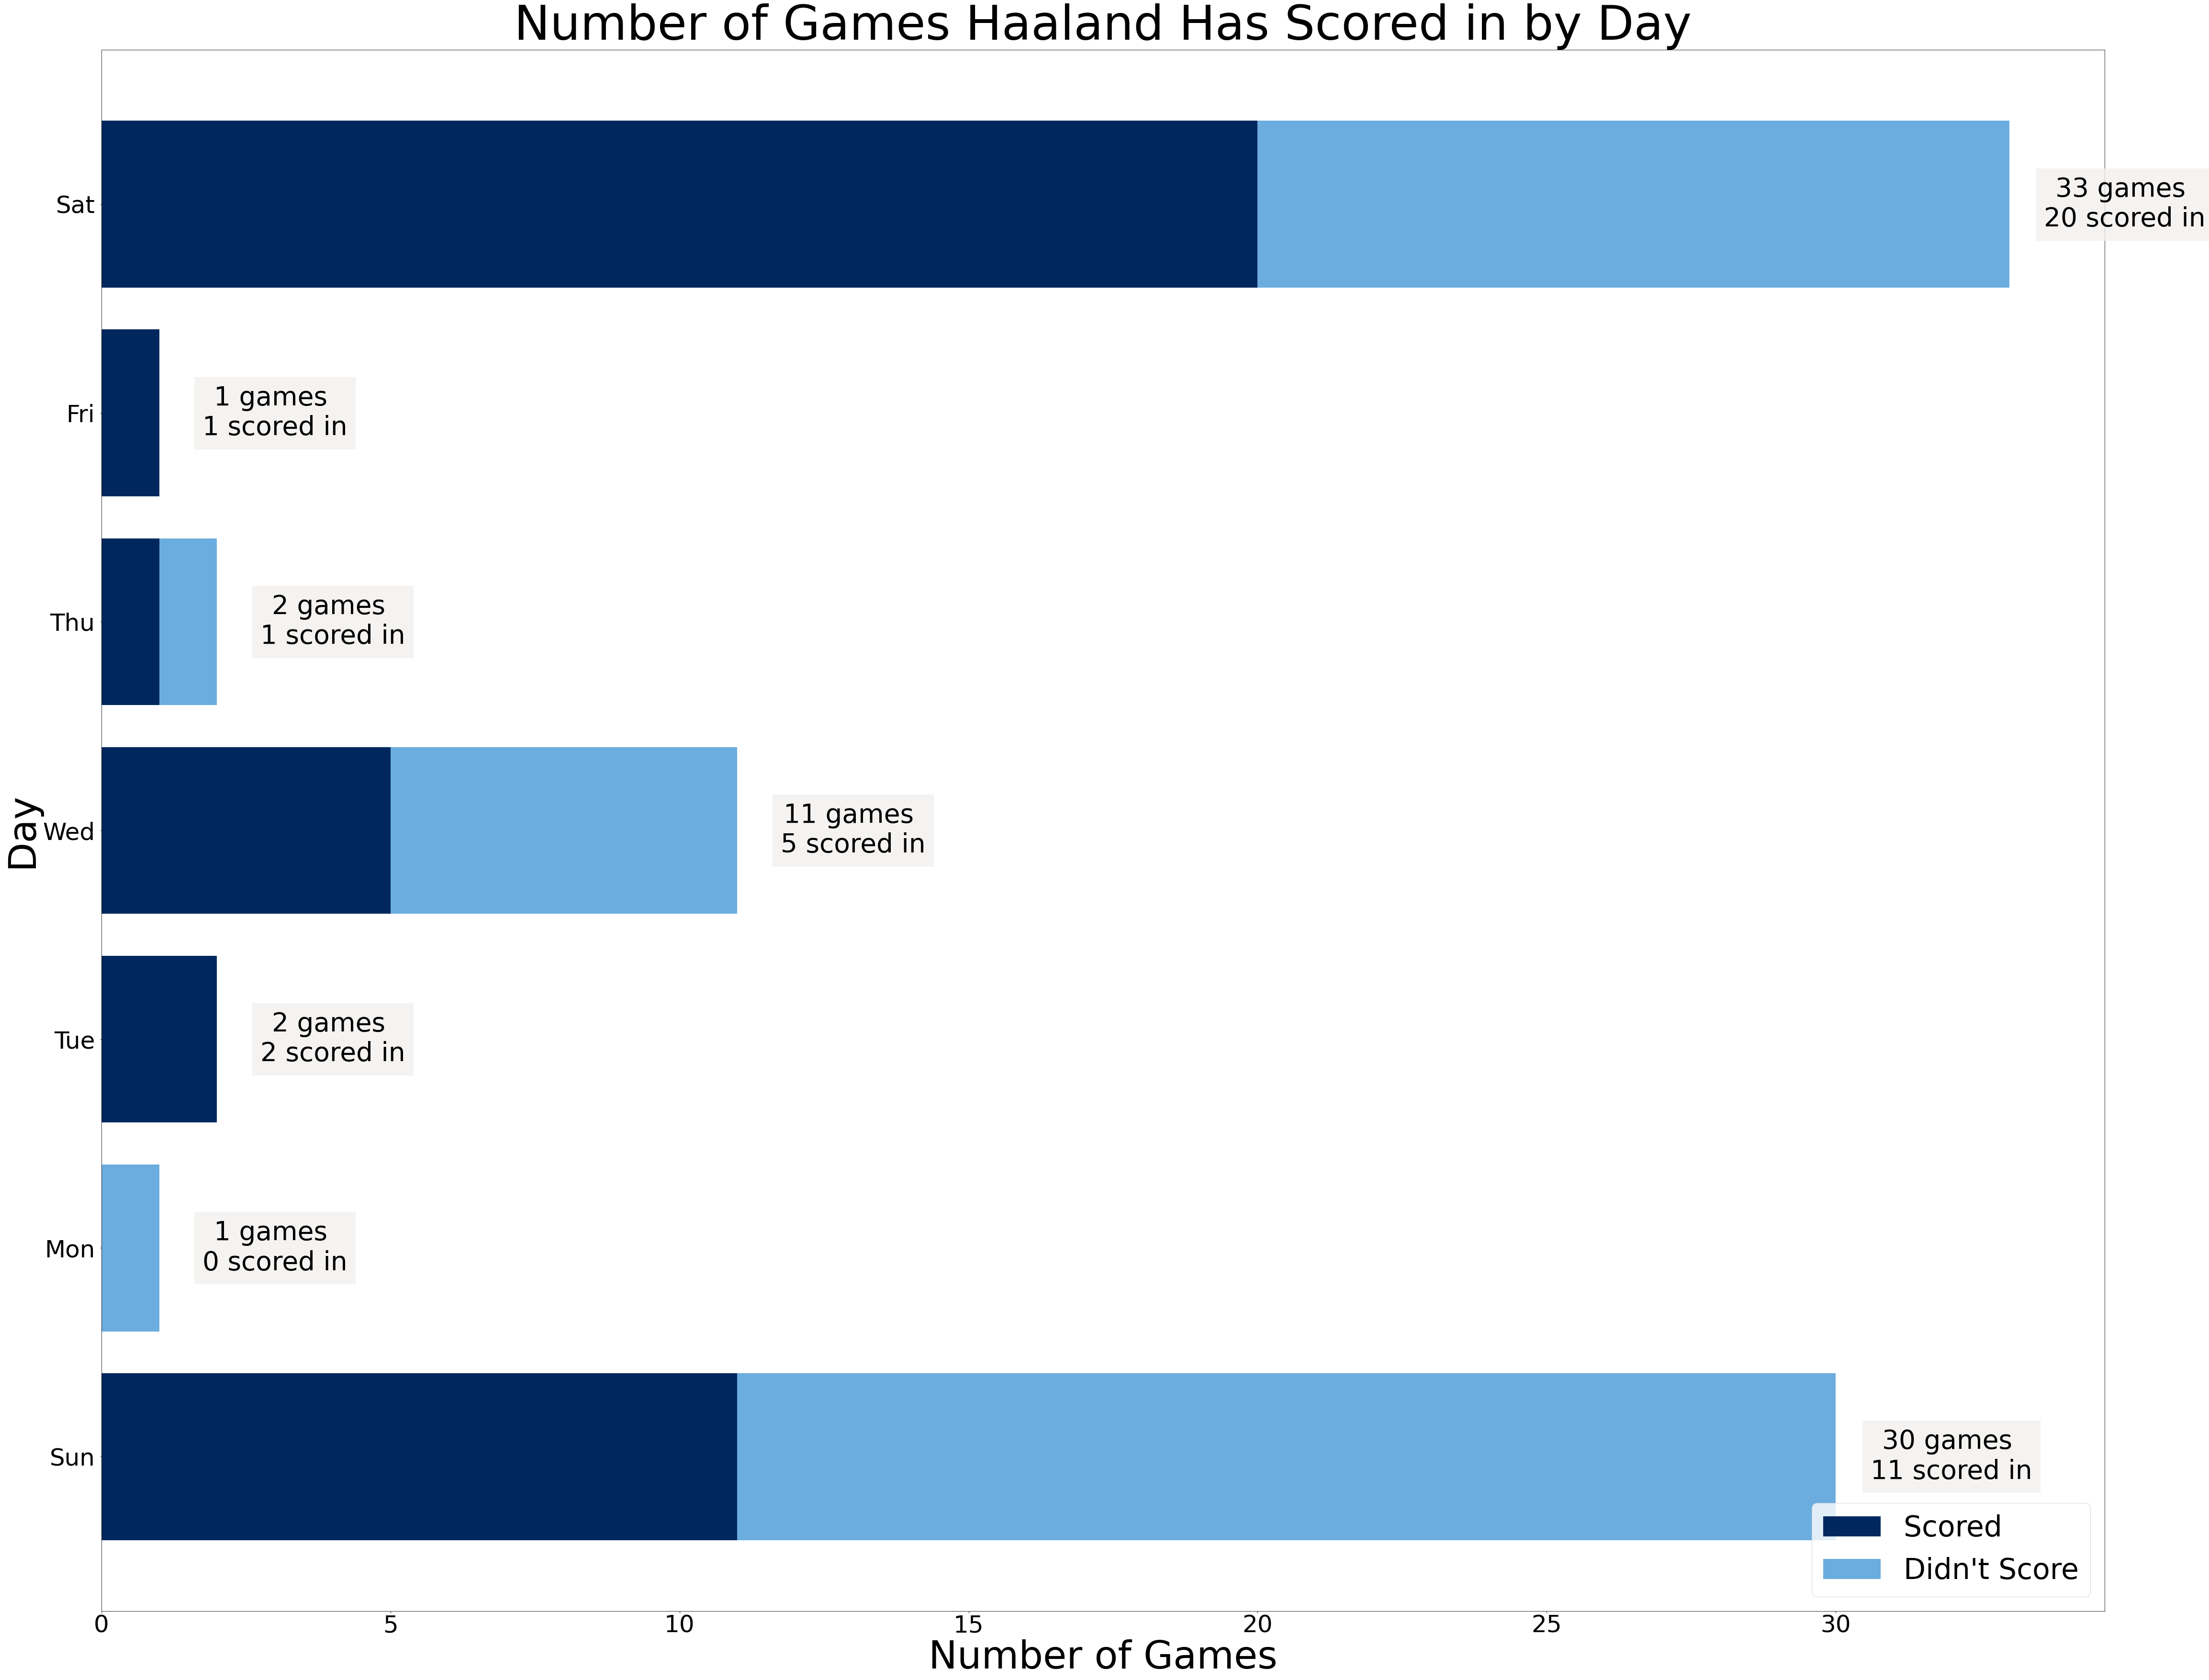

In [65]:
days=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
day_goal=[len(df[(df["Score?"]==1)&(df["Day"]==i)]) for i in days]
day_games=[len(df[(df["Day"]==i)]) for i in days]
games_no_goals=[a-b for a,b in zip(day_games, day_goal)]

fig, ax=plt.subplots(figsize=(75,60))
ax.barh(days, day_goal, color='#00285e')
ax.barh(days, games_no_goals, left=day_goal, color='#6caddf')
plt.yticks(fontsize=50)
plt.ylabel("Day", fontsize=80)
plt.xticks(fontsize=50)
plt.xlabel("Number of Games", fontsize=80)
ax.tick_params(axis='y',  pad=10) 
ax.legend(["Scored","Didn't Score"], fontsize=60, loc= 'lower right')

for i in range(len(day_goal)):
    ax.text((games_no_goals[i]+day_goal[i])+2, days[i], str(day_games[i])+ " games \n"+str(day_goal[i])+" scored in", ha='center', va="center", fontsize=55, bbox=dict(facecolor='#f3f0ee', alpha=0.8, edgecolor="#f3f0ee", boxstyle='square'))
plt.title("Number of Games Haaland Has Scored in by Day", fontsize=100)

Haaland has scored in 100% of Friday and Tuesday games, but only 36% of his Sunday games

### Games by Opponent Form

Text(0.5, 1.0, 'Number of Games Haaland Has Scored in by Opponent Form')

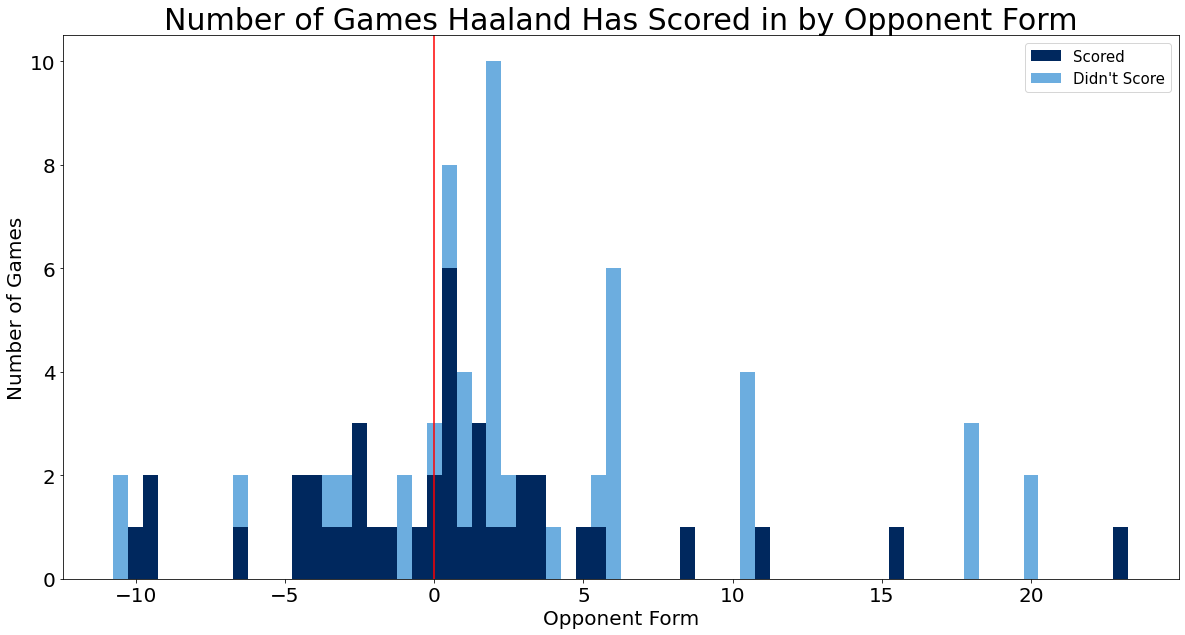

In [66]:
forms=list(df["Opponent Form"].unique())
forms_goal=[len(df[(df["Score?"]==1)&(df["Opponent Form"]==i)]) for i in forms]
forms_games=[len(df[(df["Opponent Form"]==i)]) for i in forms]
games_no_goals=[a-b for a,b in zip(forms_games, forms_goal)]

fig, ax=plt.subplots(figsize=(20,10))
ax.bar(forms, forms_goal, color='#00285e',width=0.5)
ax.bar(forms, games_no_goals, bottom=forms_goal, color='#6caddf', width=0.5)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("Opponent Form",fontsize=20)
plt.ylabel("Number of Games",fontsize=20)
plt.legend(["Scored","Didn't Score"], fontsize=15, loc= 'upper right')

plt.axvline(0, color="red")
plt.title("Number of Games Haaland Has Scored in by Opponent Form", fontsize=30)

In [67]:
positive_form_goals=len(df[(df["Score?"]==1)&(df["Opponent Form"]>0)]) 
positive_form_games=len(df[(df["Opponent Form"]>0)])
percent_scored=round((positive_form_goals/positive_form_games)*100)
        
print("Haaland has played "+str(positive_form_games)+" games against opponents with positive form (they have a winning record in the EPL)\nHe scored in "+str(positive_form_goals)+ " of them ("+str(percent_scored)+"%)")

Haaland has played 54 games against opponents with positive form (they have a winning record in the EPL)
He scored in 22 of them (41%)


In [68]:
negative_form_goals=len(df[(df["Score?"]==1)&(df["Opponent Form"]<=0)]) 
negative_form_games=len(df[(df["Opponent Form"]<0)])
percent_scored=round((negative_form_goals/negative_form_games)*100)

print("Haaland has played "+str(negative_form_games)+" games against opponents with negative form (they have a loosing record in the EPL)\nHe scored in "+str(negative_form_goals)+ " of them ("+str(percent_scored)+"%)")

Haaland has played 23 games against opponents with negative form (they have a loosing record in the EPL)
He scored in 18 of them (78%)


In [69]:
goal_games=len(df[(df["Score?"]==1)])
print(str(round((positive_form_goals/goal_games)*100))+"% of Haaland's goals have come against opponent with positive form.")

55% of Haaland's goals have come against opponent with positive form.


In [70]:
print("The average form of a team Haaland has scored against is "+str(np.mean(df[(df["Score?"]==1)].iloc[:,6].astype(int))))

The average form of a team Haaland has scored against is 0.55


One would expect a player to score more against weak opponents, but Haaland performs consistently across all opponents

## Part V: Practical Applications

Home game vs Arsenal on Sunday, September 22, 2024. Arsenal's record at this point in the season is 3-1-0, which means there form is 2.5. Haaland starts

In [71]:
arsenal_game= np.array([[2.5, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1]]) 

In [72]:
prediction = lr_model.predict(arsenal_game)
prediction_proba = lr_model.predict_proba(arsenal_game)

probability=round(prediction_proba[0][1]*100,1)
print(f"Probability Haaland will score: {probability}%")

if prediction[0]==1:
    print("Haaland will score.")
else:
    print("Haaland won't score.")

Probability Haaland will score: 57.6%
Haaland will score.


C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Bet365 odds on Haaland scoring: 2.1 -> implied probability 47.6% chance of scoring

Wager placed, bet

Home game vs Southampton on Saturday, October 26, 2024. Arsenal's record at this point in the season is 0-1-8, which means there form is -7.5. Haaland starts

In [73]:
southampton_game= np.array([[-7.5, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]) 

In [75]:
prediction = lr_model.predict(southampton_game)
prediction_proba = lr_model.predict_proba(southampton_game)

probability=round(prediction_proba[0][1]*100,1)
print(f"Probability Haaland will score: {probability}%")

if prediction[0]==1:
    print("Haaland will score.")
else:
    print("Haaland won't score.")

Probability Haaland will score: 69.9%
Haaland will score.


C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\rprat\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Bet365 odds on Haaland scoring: 1.4 -> implied probability 71.4% chance of scoring

Wager placed, bet won 